<a href="https://colab.research.google.com/github/missaixxka/HomeworkJava/blob/main/graf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание на 1 балл**

In [ ]:
import java.util.Arrays;
import java.util.LinkedList;
import java.util.Queue;

public class LongestPathBFS {

    // Вспомогательный класс для хранения результата
    public static class PathResult {
        int startNode;
        int endNode;
        int distance;

        public PathResult(int startNode, int endNode, int distance) {
            this.startNode = startNode;
            this.endNode = endNode;
            this.distance = distance;
        }

        @Override
        public String toString() {
            // Добавляем 1 к индексам для удобства пользователя (вершины 1..N)
            return "Самый длинный путь: " + (startNode + 1) + " <-> " + (endNode + 1) +
                    " (дистанция: " + distance + ")";
        }
    }

    /**
     * Находит самый длинный кратчайший путь между любыми двумя вершинами в невзвешенном графе.
     * Использует BFS, запуская его от каждой вершины.
     *
     * @param n Количество вершин в графе (от 0 до n-1).
     * @param adjMatrix Матрица смежности n x n. adjMatrix[i][j] = 1, если есть ребро, иначе 0.
     * @return Объект PathResult, содержащий начальную, конечную вершину и длину пути.
     */
    public static PathResult findLongestPath(int n, int[][] adjMatrix) {
        int maxOverallDistance = -1; // Максимальное расстояние, найденное среди всех BFS
        int longestPathStart = -1;   // Начальная вершина этого пути
        int longestPathEnd = -1;     // Конечная вершина этого пути

        if (n <= 0) {
            return new PathResult(-1, -1, -1); // Граф без вершин
        }
        if (n == 1) {
            return new PathResult(0, 0, 0); // Граф из одной вершины, расстояние 0
        }

        // Запускаем BFS от каждой вершины
        for (int startNode = 0; startNode < n; startNode++) {
            Queue<Integer> q = new LinkedList<>();
            int[] distances = new int[n]; // Массив для хранения расстояний от текущей startNode
            Arrays.fill(distances, -1);   // -1 означает, что вершина еще не посещена

            q.offer(startNode);
            distances[startNode] = 0; // Расстояние от стартовой вершины до самой себя - 0

            int currentBFSMaxDistance = 0;      // Максимальное расстояние в текущем BFS
            int currentBFSFarthestNode = startNode; // Вершина, находящаяся на этом расстоянии

            while (!q.isEmpty()) {
                int u = q.poll(); // Извлекаем текущую вершину

                // Обновляем максимальное расстояние и самую дальнюю вершину для текущего BFS
                if (distances[u] > currentBFSMaxDistance) {
                    currentBFSMaxDistance = distances[u];
                    currentBFSFarthestNode = u;
                }

                // Проходим по всем соседям вершины u
                for (int v = 0; v < n; v++) {
                    // Если есть ребро между u и v, и v еще не посещена
                    if (adjMatrix[u][v] == 1 && distances[v] == -1) {
                        distances[v] = distances[u] + 1; // Обновляем расстояние до v
                        q.offer(v); // Добавляем v в очередь
                    }
                }
            }

            // После завершения BFS от startNode, сравниваем найденное максимальное расстояние
            // с общим максимальным расстоянием, найденным до сих пор
            if (currentBFSMaxDistance > maxOverallDistance) {
                maxOverallDistance = currentBFSMaxDistance;
                longestPathStart = startNode;
                longestPathEnd = currentBFSFarthestNode;
            }
        }

        return new PathResult(longestPathStart, longestPathEnd, maxOverallDistance);
    }

    public static void main(String[] args) {
        // Пример 1: Простой линейный граф 0-1-2-3
        int n1 = 4;
        int[][] adjMatrix1 = {
                {0, 1, 0, 0},
                {1, 0, 1, 0},
                {0, 1, 0, 1},
                {0, 0, 1, 0}
        };
        // Ожидаемый результат: (1, 4) или (4, 1) с дистанцией 3
        System.out.println("Граф 1:");
        System.out.println(findLongestPath(n1, adjMatrix1)); // Вершины 1 и 4 (индексы 0 и 3)

        System.out.println("--------------------");

        // Пример 2: Звезда (центр 0, лучи 1,2,3,4)
        int n2 = 5;
        int[][] adjMatrix2 = {
                {0, 1, 1, 1, 1},
                {1, 0, 0, 0, 0},
                {1, 0, 0, 0, 0},
                {1, 0, 0, 0, 0},
                {1, 0, 0, 0, 0}
        };
        // Ожидаемый результат: любая пара "лучей" (например, 2 и 3) с дистанцией 2
        System.out.println("Граф 2:");
        System.out.println(findLongestPath(n2, adjMatrix2)); // Например, вершины 2 и 3 (индексы 1 и 2)

        System.out.println("--------------------");

        // Пример 3: Разъединенный граф
        int n3 = 6;
        int[][] adjMatrix3 = {
                {0, 1, 0, 0, 0, 0},
                {1, 0, 0, 0, 0, 0},
                {0, 0, 0, 1, 0, 0},
                {0, 0, 1, 0, 0, 0},
                {0, 0, 0, 0, 0, 1},
                {0, 0, 0, 0, 1, 0}
        };
        // Ожидаемый результат: любая пара соединенных вершин (например, 1 и 2) с дистанцией 1
        System.out.println("Граф 3:");
        System.out.println(findLongestPath(n3, adjMatrix3)); // Например, вершины 1 и 2 (индексы 0 и 1)

        System.out.println("--------------------");

        // Пример 4: Более длинный линейный граф
        int n4 = 6;
        int[][] adjMatrix4 = {
                {0, 1, 0, 0, 0, 0}, // 0-1
                {1, 0, 1, 0, 0, 0}, //   1-2
                {0, 1, 0, 1, 0, 0}, //     2-3
                {0, 0, 1, 0, 1, 0}, //       3-4
                {0, 0, 0, 1, 0, 1}, //         4-5
                {0, 0, 0, 0, 1, 0}
        };
        // Ожидаемый результат: (1, 6) или (6, 1) с дистанцией 5
        System.out.println("Граф 4:");
        System.out.println(findLongestPath(n4, adjMatrix4)); // Вершины 1 и 6 (индексы 0 и 5)
    }
}



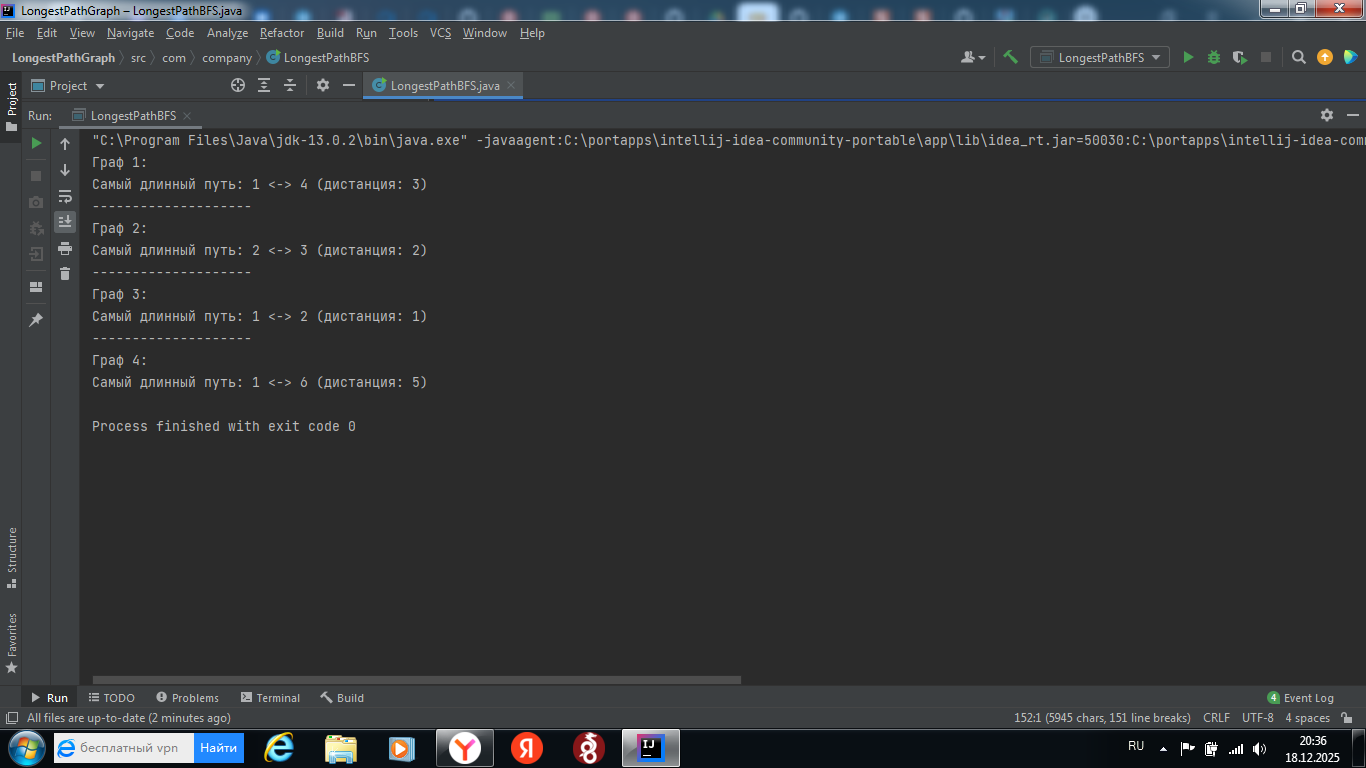